In [7]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import h5py
import cv2; print(f"\t\t– CV2 VERSION: {cv2.__version__}");

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


		– CV2 VERSION: 4.10.0


In [8]:
class CFG:
    is_kaggle = False
    if not is_kaggle:
        TRAIN_DIR = Path('/root/Development/Kaggle/ISIC2024/data/raw/train-image/image')
        TRAIN_HDF5 = Path('/root/Development/Kaggle/ISIC2024/data/raw/train-image.hdf5')
        TEST_HDF5 = Path('/root/Development/Kaggle/ISIC2024/data/raw/test-image.hdf5')
        TRAIN_META = Path('/root/Development/Kaggle/ISIC2024/data/raw/train-metadata.csv')
        TEST_META = Path('/root/Development/Kaggle/ISIC2024/data/raw/test-metadata.csv')
        SAMPLE_SUB = Path('/root/Development/Kaggle/ISIC2024/data/raw/sample_submission.csv')

In [9]:
train_meta = pd.read_csv(CFG.TRAIN_META)
test_meta = pd.read_csv(CFG.TEST_META)

/tmp/ipykernel_1450942/1477649873.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_meta = pd.read_csv(CFG.TRAIN_META)


In [10]:
def unique_elements(list1, list2):
    # Create sets from the lists to remove duplicates within each list
    set1 = set(list1)
    set2 = set(list2)
    
    # Find elements that are unique to each set
    unique_to_list1 = set1 - set2
    unique_to_list2 = set2 - set1
    
    # Combine the unique elements from both lists
    unique_elements = list(unique_to_list1.union(unique_to_list2))
    
    return unique_elements

In [11]:
# len
print(len(train_meta))
print(len(test_meta))

# columns len
print(len(train_meta.columns))
print(len(test_meta.columns))
print(len(unique_elements(train_meta.columns, test_meta.columns)))

# columns
print(train_meta.columns)
print(test_meta.columns)
print(unique_elements(train_meta.columns, test_meta.columns))

# head
display(train_meta[train_meta['target'] > 0.5].head(10))
display(train_meta.head())
display(test_meta.head())

401059
3
55
44
11
Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,tbp_lv_L,tbp_lv_Lext,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_deltaA,tbp_lv_deltaB,tbp_lv_deltaL,tbp_lv_deltaLB,tbp_lv_deltaLBnorm,tbp_lv_eccentricity,tbp_lv_location,tbp_lv_location_simple,tbp_lv_minorAxisMM,tbp_lv_nevi_confidence,tbp_lv_norm_border,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
387,ISIC_0082829,1,IP_3249371,80.0,female,anterior torso,9.27,TBP tile: close-up,3D: XP,18.093368,13.054772,19.090458,21.211776,26.302386,24.907158,46.536028,58.389811,23.395088,34.784341,40.964534,25.940259,3.287692,5.038595,-2.121318,-11.389253,11.836020,12.342322,0.763841,Torso Front Top Half,Torso Front,6.677133,1.597228e-02,5.936484,9.830578,32.598015,3.514434,5.464301,2.717044,0.472358,0,61.956005,1180.003540,-77.904053,"Department of Dermatology, Hospital Clínic de ...",CC-BY-NC,IL_7881385,Malignant::Malignant epidermal proliferations:...,Malignant,Malignant epidermal proliferations,Squamous cell carcinoma in situ,NaN,NaN,NaN,NaN,72.211683
935,ISIC_0096034,1,IP_6723298,75.0,male,head/neck,3.88,TBP tile: close-up,3D: white,26.187010,21.394010,25.553420,24.914770,36.588750,32.839750,44.298420,49.347720,49.373060,57.114240,6.192531,30.648580,0.624458,4.793001,0.638651,-7.741185,8.023705,5.716512,0.672715,Head & Neck,Head & Neck,2.710643,9.713997e-04,7.567831,1.757932,13.776510,0.549971,1.604156,2.798056,0.576744,15,54.423520,1675.860000,-37.749880,Memorial Sloan Kettering Cancer Center,CC-BY,IL_5240575,Malignant::Malignant adnexal epithelial prolif...,Malignant,Malignant adnexal epithelial proliferations - ...,Basal cell carcinoma,"Basal cell carcinoma, Nodular",NaN,NaN,NaN,94.559590
1245,ISIC_0104229,1,IP_9057861,80.0,male,anterior torso,6.55,TBP tile: close-up,3D: white,33.480140,24.249430,26.160100,25.295430,42.488470,35.041320,38.002700,46.209460,50.728930,58.546240,12.103580,38.025960,1.401430,9.230707,0.864665,-7.817310,8.023790,5.621653,0.907116,Torso Front Top Half,Torso Front,3.481341,1.629116e-12,8.688260,4.108186,21.453450,1.340916,1.539307,3.697858,0.546485,155,84.834820,1441.758000,-60.321040,Memorial Sloan Kettering Cancer Center,CC-BY,IL_1702337,Malignant::Malignant adnexal epithelial prolif...,Malignant,Malignant adnexal epithelial proliferations - ...,Basal cell carcinoma,"Basal cell carcinoma, Nodular",NaN,NaN,NaN,66.196170
1846,ISIC_0119495,1,IP_6856511,60.0,male,upper extremity,5.27,TBP tile: close-up,3D: white,25.872050,20.194650,26.805590,28.459890,37.254570,34.896840,46.015270,54.641140,56.674930,64.638890,13.267030,30.444160,1.472167,5.677403,-1.654301,-7.963960,8.284219,5.481429,0.745061,Right Arm - Upper,Right Arm,3.573096,1.106073e+00,6.435350,3.850777,20.097350,1.104453,2.575811,2.600541,0.428889,160,293.127500,1425.201000,50.789730,Memorial Sloan Kettering Cancer Center,CC-BY,IL_3266850,Malignant::Malignant epidermal proliferations:...,Malignant,Malignant epidermal proliferations,"Squamous cell carcinoma, Invasive",NaN,NaN,NaN,NaN,99.991270
3478,ISIC_0157834,1,IP_3927284,55.0,male,posterior torso,5.29,TBP tile: close-up,3D: white,30.966662,22.008635,24.066940,26.734379,39.219278,34.628125,37.853948,50.537646,55.210012,66.135030,15.049728,24.313243,2.243673,8.958027,-2.667440,-10.925018,11.522597,7.399501,0.690814,Torso Back Top Third,Torso Back,4.222128,2.115099e-02,5.267599,7.734870,19.128714,2.904396,4.122797,3.134399,0.422091,65,-128.599152,1481.198364,13.294312,Memorial Sloan Kettering Cancer Center,CC-BY,IL_2429082,Malignant::Malignant adnexal epithelial prolif...,Malignant,Malignant adnexal epithelial proliferations - ...,Bas

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,tbp_lv_L,tbp_lv_Lext,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_deltaA,tbp_lv_deltaB,tbp_lv_deltaL,tbp_lv_deltaLB,tbp_lv_deltaLBnorm,tbp_lv_eccentricity,tbp_lv_location,tbp_lv_location_simple,tbp_lv_minorAxisMM,tbp_lv_nevi_confidence,tbp_lv_norm_border,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,16.261975,26.922447,23.954773,33.684638,28.953117,53.058545,55.828924,54.367448,62.025701,3.152561,27.476170,0.00000,3.982447,2.967674,-7.658253,8.360566,5.784302,0.901302,Right Leg - Upper,Right Leg,1.543016,2.628592e-03,7.091360,0.000000,9.307003,0.00000,2.036195,2.637780,0.590476,85,-182.703552,613.493652,-42.427948,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,25.364740,26.331000,24.549290,41.219030,35.299260,39.702910,44.064040,48.861520,55.362360,0.919497,12.235290,0.00000,6.347830,1.781713,-6.500838,6.839008,4.987244,0.639885,Head & Neck,Head & Neck,0.821918,1.334303e-07,2.116402,0.000000,3.354148,0.00000,0.853227,3.912844,0.285714,55,-0.078308,1575.687000,57.174500,Memorial Sloan Kettering Cancer Center,CC-BY,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,17.128170,37.970460,33.485410,44.174920,37.611800,59.265850,62.909730,53.961180,61.670520,3.265153,24.184620,0.00000,5.447655,4.485044,-7.709336,9.092376,6.290359,0.932147,Torso Back Top Third,Torso Back,1.194905,2.959177e-04,4.798335,0.000000,8.886309,0.00000,1.743651,1.950777,0.361905,105,123.649700,1472.010000,232.908900,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,12.164757,21.448144,21.121356,25.746200,24.374023,56.414429,60.060388,18.649518,23.314841,6.079940,14.889242,0.51452,2.077572,0.326788,-4.665323,4.783413,6.400196,0.654458,Torso Front Top Half,Torso Front,2.481328,2.198945e+01,1.975874,1.771705,9.514499,0.66469,1.258541,1.573733,0.209581,130,-141.024780,1442.185791,58.359802,ACEMID MIA,CC-0,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,20.057470,26.464900,25.710460,36.217980,32.608740,46.946070,52.041180,46.276310,54.855740,2.101708,19.902560,0.00000,4.668053,0.754434,-8.579431,9.148495,6.531302,0.946448,Torso Front Top Half,Torso Front,0.929916,1.378832e-03,3.658854,0.000000,6.467562,0.00000,2.085409,2.480509,0.313433,20,-72.315640,1488.720000,21.428960,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


,isic_id,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,tbp_lv_L,tbp_lv_Lext,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_deltaA,tbp_lv_deltaB,tbp_lv_deltaL,tbp_lv_deltaLB,tbp_lv_deltaLBnorm,tbp_lv_eccentricity,tbp_lv_location,tbp_lv_location_simple,tbp_lv_minorAxisMM,tbp_lv_nevi_confidence,tbp_lv_norm_border,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license
0,ISIC_0015657,IP_6074337,45.0,male,posterior torso,2.70,TBP tile: close-up,3D: XP,22.80433,20.007270,28.38412,27.043640,36.410100,33.640000,51.220960,53.505430,24.97985,31.114600,3.846876,22.907010,0.461149,2.797056,1.340481,-6.134747,6.436557,6.843057,0.664465,Torso Back Top Third,Torso Back,2.187644,1.698104e-02,5.435366,1.143374,9.387248,0.304827,1.281532,2.299935,0.479339,20,-155.06510,1511.222000,113.980100,Memorial Sloan Kettering Cancer Center,CC-BY
1,ISIC_0015729,IP_1664139,35.0,female,lower extremity,2.52,TBP tile: close-up,3D: XP,16.64867,9.657964,31.31752,27.524318,35.467806,29.169579,62.004494,70.664619,59.90409,68.141071,2.120473,18.957821,0.000000,6.990705,3.793202,-8.236981,9.151127,6.083388,0.926698,Left Leg - Upper,Left Leg,1.032666,2.107364e-01,4.322201,0.000000,6.340311,0.000000,1.271940,2.011223,0.426230,25,-112.36924,629.535889,-15.019287,"Frazer Institute, The University of Queensland...",CC-BY
2,ISIC_0015740,IP_7142616,65.0,male,posterior torso,3.16,TBP tile: close-up,3D: XP,24.25384,19.937380,30.46368,28.384240,38.939500,34.686660,51.474730,54.915410,35.81945,41.358640,3.396510,19.464400,0.251236,4.316465,2.079433,-5.539191,6.041092,5.446997,0.894776,Torso Back Top Third,Torso Back,1.520786,8.052259e-13,3.968912,0.721739,8.130868,0.230742,1.080308,2.705857,0.366071,110,-84.29282,1303.978000,-28.576050,FNQH Cairns,CC-BY


In [12]:
# kaggleのnotebook環境での実行を推奨
class preprocessing():
    def __init__(self, train):
        self.train = train
        categorical_columns = self.train.select_dtypes(include=['object', 'category']).columns
        categorical_columns = [element for element in categorical_columns if element not in ['isic_id', 'patient_id']]
        self.value_counts = categorical_columns
    def grouping(self):
        train = self.train.groupby("isic_id").head(1).reset_index(drop=True)
        print(train.shape)
    def data_check(self):
        print("\n" + "/"*10 + "shape" + "/"*20)
        print(self.train.shape)
        print("\n" + "/"*10 + "shape in unique id" + "/"*20)
        self.grouping()
        print("\n" + "/"*10 + "info()" + "/"*20)
        display(self.train.info())
        print("\n" + "/"*10 + "dtypes" + "/"*20)
        display(self.train.dtypes)
        print("\n" + "/"*10 + "descrive()" + "/"*20)
        display(self.train.describe().T)
        # descrive categorical data
        print("\n" + "/"*10 + "descrive(include=[0])" + "/"*20)
        display(self.train.describe(include=['O']).T)
        # print("\n" + "/"*10 + "unique() expert_consensus" + "/"*20)
        # display(self.train['expert_consensus'].unique())
        # print("\n" + "/"*10 + "nunique() expert_consensus" + "/"*20)
        # display(self.train['expert_consensus'].nunique())
        # print("\n" + "/"*10 + "unique() seizure_vote" + "/"*20)
        # display(self.train['seizure_vote'].unique())
        # print("\n" + "/"*10 + "nunique() seizure_vote" + "/"*20)
        # display(self.train['seizure_vote'].nunique())
        # num of missing value in every column
        print("\n" + "/"*10 + "isnull().sum()" + "/"*20)
        display(self.train.isnull().sum())
        # num of missing value whole data
        print("\n" + "/"*10 + "isnull().sum().sum()" + "/"*20)
        display(self.train.isnull().sum().sum())
        # check appearance frequency of specify column
        print("\n" + "/"*10 + "value_counts() target" + "/"*20)
        display(self.train['target'].value_counts())
        for i in self.value_counts:
            print("\n" + "/"*10 + f"value_counts() {i}" + "/"*20)
            display(self.train[i].value_counts())
        for i in self.value_counts:
            print("\n" + "/"*10 + f"value_counts() {i} with target==1" + "/"*20)
            display(self.train[self.train['target'] == 1][i].value_counts())
        # print("\n" + "/"*10 + "value_counts() seizure_vote" + "/"*20)
        # display(self.train['seizure_vote'].value_counts())

def load_data():
    prep = preprocessing(train_meta)
    prep.data_check()

load_data()


//////////shape////////////////////
(401059, 55)

//////////shape in unique id////////////////////
(401059, 55)



//////////info()////////////////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv

None


//////////dtypes////////////////////


isic_id                          object
target                            int64
patient_id                       object
age_approx                      float64
sex                              object
anatom_site_general              object
clin_size_long_diam_mm          float64
image_type                       object
tbp_tile_type                    object
tbp_lv_A                        float64
tbp_lv_Aext                     float64
tbp_lv_B                        float64
tbp_lv_Bext                     float64
tbp_lv_C                        float64
tbp_lv_Cext                     float64
tbp_lv_H                        float64
tbp_lv_Hext                     float64
tbp_lv_L                        float64
tbp_lv_Lext                     float64
tbp_lv_areaMM2                  float64
tbp_lv_area_perim_ratio         float64
tbp_lv_color_std_mean           float64
tbp_lv_deltaA                   float64
tbp_lv_deltaB                   float64
tbp_lv_deltaL                   float64



//////////descrive()////////////////////


,count,mean,std,min,25%,50%,75%,max
target,401059.0,0.000980,0.031288,0.000000e+00,0.000000,0.000000,0.000000,1.000000
age_approx,398261.0,58.012986,13.596165,5.000000e+00,50.000000,60.000000,70.000000,85.000000
clin_size_long_diam_mm,401059.0,3.930827,1.743068,1.000000e+00,2.840000,3.370000,4.380000,28.400000
tbp_lv_A,401059.0,19.974007,3.999489,-2.487115e+00,17.330821,19.801910,22.304628,48.189610
tbp_lv_Aext,401059.0,14.919247,3.529384,-9.080269e+00,12.469740,14.713930,17.137175,37.021680
tbp_lv_B,401059.0,28.281706,5.278676,-7.309895e-01,24.704372,28.171570,31.637429,54.306900
tbp_lv_Bext,401059.0,26.913015,4.482994,9.237066e+00,23.848125,26.701704,29.679913,48.372700
tbp_lv_C,401059.0,34.786341,5.708469,3.054228e+00,31.003148,34.822580,38.430298,58.765170
tbp_lv_Cext,401059.0,30.921279,4.829345,1.184652e+01,27.658285,30.804893,33.963868,54.305290
tbp_lv_H,401059.0,54.653689,5.520849,-1.574164e+00,51.566273,55.035632,58.298184,105.875784



//////////descrive(include=[0])////////////////////


,count,unique,top,freq
isic_id,401059,401059,ISIC_9999967,1
patient_id,401059,1042,IP_1117889,9184
sex,389542,2,male,265546
anatom_site_general,395303,5,posterior torso,121902
image_type,401059,1,TBP tile: close-up,401059
tbp_tile_type,401059,2,3D: XP,285903
tbp_lv_location,401059,21,Torso Back Top Third,71112
tbp_lv_location_simple,401059,8,Torso Back,121902
attribution,401059,7,Memorial Sloan Kettering Cancer Center,129068
copyright_license,401059,3,CC-BY,188812



//////////isnull().sum()////////////////////


isic_id                              0
target                               0
patient_id                           0
age_approx                        2798
sex                              11517
anatom_site_general               5756
clin_size_long_diam_mm               0
image_type                           0
tbp_tile_type                        0
tbp_lv_A                             0
tbp_lv_Aext                          0
tbp_lv_B                             0
tbp_lv_Bext                          0
tbp_lv_C                             0
tbp_lv_Cext                          0
tbp_lv_H                             0
tbp_lv_Hext                          0
tbp_lv_L                             0
tbp_lv_Lext                          0
tbp_lv_areaMM2                       0
tbp_lv_area_perim_ratio              0
tbp_lv_color_std_mean                0
tbp_lv_deltaA                        0
tbp_lv_deltaB                        0
tbp_lv_deltaL                        0
tbp_lv_deltaLB           


//////////isnull().sum().sum()////////////////////


2802625


//////////value_counts() target////////////////////


target
0    400666
1       393
Name: count, dtype: int64


//////////value_counts() sex////////////////////


sex
male      265546
female    123996
Name: count, dtype: int64


//////////value_counts() anatom_site_general////////////////////


anatom_site_general
posterior torso    121902
lower extremity    103028
anterior torso      87770
upper extremity     70557
head/neck           12046
Name: count, dtype: int64


//////////value_counts() image_type////////////////////


image_type
TBP tile: close-up    401059
Name: count, dtype: int64


//////////value_counts() tbp_tile_type////////////////////


tbp_tile_type
3D: XP       285903
3D: white    115156
Name: count, dtype: int64


//////////value_counts() tbp_lv_location////////////////////


tbp_lv_location
Torso Back Top Third       71112
Torso Front Top Half       63350
Torso Back Middle Third    46185
Left Leg - Lower           27428
Right Leg - Lower          25208
Torso Front Bottom Half    24360
Left Leg - Upper           23673
Right Leg - Upper          23034
Right Arm - Upper          22972
Left Arm - Upper           22816
Head & Neck                12046
Left Arm - Lower           11939
Right Arm - Lower          10636
Unknown                     5756
Torso Back Bottom Third     4596
Left Leg                    1974
Right Leg                   1711
Left Arm                    1593
Right Arm                    601
Torso Front                   60
Torso Back                     9
Name: count, dtype: int64


//////////value_counts() tbp_lv_location_simple////////////////////


tbp_lv_location_simple
Torso Back     121902
Torso Front     87770
Left Leg        53075
Right Leg       49953
Left Arm        36348
Right Arm       34209
Head & Neck     12046
Unknown          5756
Name: count, dtype: int64


//////////value_counts() attribution////////////////////


attribution
Memorial Sloan Kettering Cancer Center                                                                                                                 129068
Department of Dermatology, Hospital Clínic de Barcelona                                                                                                105724
University Hospital of Basel                                                                                                                            65218
Frazer Institute, The University of Queensland, Dermatology Research Centre                                                                             51768
ACEMID MIA                                                                                                                                              28665
ViDIR Group, Department of Dermatology, Medical University of Vienna                                                                                    12640
Department of Dermatology, University of


//////////value_counts() copyright_license////////////////////


copyright_license
CC-BY       188812
CC-BY-NC    183582
CC-0         28665
Name: count, dtype: int64


//////////value_counts() lesion_id////////////////////


lesion_id
IL_9852274    1
IL_6727506    1
IL_3854228    1
IL_9898853    1
IL_2988728    1
IL_6219432    1
IL_6272856    1
IL_9949284    1
IL_3272524    1
IL_5505434    1
IL_2083923    1
IL_4478182    1
IL_4174457    1
IL_8757277    1
IL_4007970    1
IL_4483086    1
IL_8799582    1
IL_9975676    1
IL_7776976    1
IL_0266589    1
IL_6440339    1
IL_8858799    1
IL_3775140    1
IL_9030348    1
IL_3785498    1
IL_4186488    1
IL_9928391    1
IL_5077052    1
IL_9365361    1
IL_5990946    1
IL_1268562    1
IL_5608186    1
IL_4721793    1
IL_7645320    1
IL_7206529    1
IL_8053826    1
IL_5591365    1
IL_2121448    1
IL_1987289    1
IL_3077813    1
IL_4866043    1
IL_9437707    1
IL_7650801    1
IL_9570158    1
IL_8612635    1
IL_3010646    1
IL_7124560    1
IL_3721178    1
IL_3793468    1
IL_0751810    1
IL_9966715    1
IL_6735534    1
IL_9153275    1
IL_6792982    1
IL_2536074    1
IL_5338020    1
IL_6881688    1
IL_2217299    1
IL_9973076    1
IL_0344857    1
IL_6097172    1
IL_8752001    


//////////value_counts() iddx_full////////////////////


iddx_full
Benign                                                                                                                                                           399991
Benign::Benign melanocytic proliferations::Nevus::Nevus, Atypical, Dysplastic, or Clark                                                                             228
Benign::Benign melanocytic proliferations::Nevus                                                                                                                    141
Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Nodular                                             98
Indeterminate::Indeterminate melanocytic proliferations::Atypical melanocytic neoplasm                                                                               64
Benign::Benign epidermal proliferations::Seborrheic keratosis                                                                                         


//////////value_counts() iddx_1////////////////////


iddx_1
Benign           400552
Malignant           393
Indeterminate       114
Name: count, dtype: int64


//////////value_counts() iddx_2////////////////////


iddx_2
Benign melanocytic proliferations                                 443
Malignant adnexal epithelial proliferations - Follicular          163
Malignant melanocytic proliferations (Melanoma)                   157
Benign epidermal proliferations                                    83
Indeterminate melanocytic proliferations                           75
Malignant epidermal proliferations                                 73
Indeterminate epidermal proliferations                             39
Benign soft tissue proliferations - Fibro-histiocytic              15
Inflammatory or infectious diseases                                 7
Flat melanotic pigmentations - not melanocytic nevus                5
Benign soft tissue proliferations - Vascular                        3
Cysts                                                               2
Benign adnexal epithelial proliferations - Follicular               2
Benign adnexal epithelial proliferations - Apocrine or Eccrine      1
Name: count, 


//////////value_counts() iddx_3////////////////////


iddx_3
Nevus                                                 443
Basal cell carcinoma                                  163
Melanoma in situ                                       80
Atypical melanocytic neoplasm                          64
Melanoma Invasive                                      63
Seborrheic keratosis                                   57
Squamous cell carcinoma in situ                        49
Solar or actinic keratosis                             39
Squamous cell carcinoma, Invasive                      22
Melanoma, NOS                                          13
Solar lentigo                                          12
Lichen planus like keratosis                           11
Dermatofibroma                                         11
Atypical intraepithelial melanocytic proliferation     11
Verruca                                                 7
Lentigo NOS                                             5
Pigmented benign keratosis                              3
Hemangi


//////////value_counts() iddx_4////////////////////


iddx_4
Nevus, Atypical, Dysplastic, or Clark                                             228
Basal cell carcinoma, Nodular                                                      98
Basal cell carcinoma, Superficial                                                  48
Melanoma Invasive, Superficial spreading                                           37
Nevus, NOS, Compound                                                               30
Nevus, NOS, Dermal                                                                 20
Melanoma in situ, associated with a nevus                                          12
Melanoma in situ, Lentigo maligna type                                             12
Melanoma in situ, Superficial spreading                                            10
Nevus, NOS, Junctional                                                             10
Melanoma Invasive, Associated with a nevus                                          7
Basal cell carcinoma, Infiltrating             


//////////value_counts() iddx_5////////////////////


iddx_5
Blue nevus, Cellular    1
Name: count, dtype: int64


//////////value_counts() mel_mitotic_index////////////////////


mel_mitotic_index
0/mm^2     22
<1/mm^2    19
>4/mm^2     4
1/mm^2      3
3/mm^2      2
2/mm^2      2
4/mm^2      1
Name: count, dtype: int64


//////////value_counts() sex with target==1////////////////////


sex
male      274
female    109
Name: count, dtype: int64


//////////value_counts() anatom_site_general with target==1////////////////////


anatom_site_general
posterior torso    103
anterior torso      82
head/neck           78
lower extremity     73
upper extremity     57
Name: count, dtype: int64


//////////value_counts() image_type with target==1////////////////////


image_type
TBP tile: close-up    393
Name: count, dtype: int64


//////////value_counts() tbp_tile_type with target==1////////////////////


tbp_tile_type
3D: XP       197
3D: white    196
Name: count, dtype: int64


//////////value_counts() tbp_lv_location with target==1////////////////////


tbp_lv_location
Head & Neck                78
Torso Front Top Half       69
Torso Back Top Third       67
Torso Back Middle Third    32
Right Leg - Lower          24
Left Leg - Lower           24
Left Arm - Upper           20
Right Arm - Upper          18
Left Leg - Upper           14
Torso Front Bottom Half    13
Left Arm - Lower           12
Left Leg                    6
Right Arm - Lower           5
Torso Back Bottom Third     4
Right Leg - Upper           4
Left Arm                    2
Right Leg                   1
Name: count, dtype: int64


//////////value_counts() tbp_lv_location_simple with target==1////////////////////


tbp_lv_location_simple
Torso Back     103
Torso Front     82
Head & Neck     78
Left Leg        44
Left Arm        34
Right Leg       29
Right Arm       23
Name: count, dtype: int64


//////////value_counts() attribution with target==1////////////////////


attribution
Memorial Sloan Kettering Cancer Center                                                                                                                 174
Frazer Institute, The University of Queensland, Dermatology Research Centre                                                                             81
Department of Dermatology, Hospital Clínic de Barcelona                                                                                                 72
ACEMID MIA                                                                                                                                              33
ViDIR Group, Department of Dermatology, Medical University of Vienna                                                                                    14
University Hospital of Basel                                                                                                                            13
Department of Dermatology, University of Athens, Andreas S


//////////value_counts() copyright_license with target==1////////////////////


copyright_license
CC-BY       261
CC-BY-NC     99
CC-0         33
Name: count, dtype: int64


//////////value_counts() lesion_id with target==1////////////////////


lesion_id
IL_2734444    1
IL_7881385    1
IL_5240575    1
IL_1702337    1
IL_3266850    1
IL_2429082    1
IL_3603982    1
IL_4594949    1
IL_8860946    1
IL_8558961    1
IL_6893686    1
IL_9501924    1
IL_2629349    1
IL_0637957    1
IL_5575792    1
IL_1655369    1
IL_8202206    1
IL_4572818    1
IL_9097741    1
IL_0663520    1
IL_2755989    1
IL_2923914    1
IL_9460914    1
IL_8910080    1
IL_6286070    1
IL_5097969    1
IL_1535377    1
IL_2546515    1
IL_3100877    1
IL_5865051    1
IL_1433993    1
IL_4051898    1
IL_6000663    1
IL_1552808    1
IL_3576245    1
IL_2889618    1
IL_8184361    1
IL_7898466    1
IL_7642088    1
IL_6937390    1
IL_4834283    1
IL_0241923    1
IL_5025970    1
IL_8045669    1
IL_8259475    1
IL_8695329    1
IL_2419313    1
IL_4579711    1
IL_7008082    1
IL_7309714    1
IL_5096102    1
IL_0870330    1
IL_0615040    1
IL_6691721    1
IL_8454591    1
IL_7419475    1
IL_8206011    1
IL_5067478    1
IL_7318540    1
IL_6760832    1
IL_2726474    1
IL_3484620    


//////////value_counts() iddx_full with target==1////////////////////


iddx_full
Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Nodular                                         98
Malignant::Malignant epidermal proliferations::Squamous cell carcinoma in situ                                                                                   48
Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Superficial                                     48
Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ                                                                                     46
Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma Invasive::Melanoma Invasive, Superficial spreading                                          37
Malignant::Malignant epidermal proliferations::Squamous cell carcinoma, Invasive                                                                                 17
Malign


//////////value_counts() iddx_1 with target==1////////////////////


iddx_1
Malignant    393
Name: count, dtype: int64


//////////value_counts() iddx_2 with target==1////////////////////


iddx_2
Malignant adnexal epithelial proliferations - Follicular    163
Malignant melanocytic proliferations (Melanoma)             157
Malignant epidermal proliferations                           73
Name: count, dtype: int64


//////////value_counts() iddx_3 with target==1////////////////////


iddx_3
Basal cell carcinoma                 163
Melanoma in situ                      80
Melanoma Invasive                     63
Squamous cell carcinoma in situ       49
Squamous cell carcinoma, Invasive     22
Melanoma, NOS                         13
Squamous cell carcinoma, NOS           2
Melanoma metastasis                    1
Name: count, dtype: int64


//////////value_counts() iddx_4 with target==1////////////////////


iddx_4
Basal cell carcinoma, Nodular                                                     98
Basal cell carcinoma, Superficial                                                 48
Melanoma Invasive, Superficial spreading                                          37
Melanoma in situ, Lentigo maligna type                                            12
Melanoma in situ, associated with a nevus                                         12
Melanoma in situ, Superficial spreading                                           10
Melanoma Invasive, Associated with a nevus                                         7
Basal cell carcinoma, Infiltrating                                                 6
Squamous cell carcinoma, Invasive, Keratoacanthoma-type                            5
Melanoma Invasive, On chronically sun-exposed skin or lentigo maligna melanoma     5
Squamous cell carcinoma in situ, Bowens disease                                    1
Melanoma Invasive, Nodular                                


//////////value_counts() iddx_5 with target==1////////////////////


Series([], Name: count, dtype: int64)


//////////value_counts() mel_mitotic_index with target==1////////////////////


mel_mitotic_index
0/mm^2     22
<1/mm^2    19
>4/mm^2     4
1/mm^2      3
3/mm^2      2
2/mm^2      2
4/mm^2      1
Name: count, dtype: int64

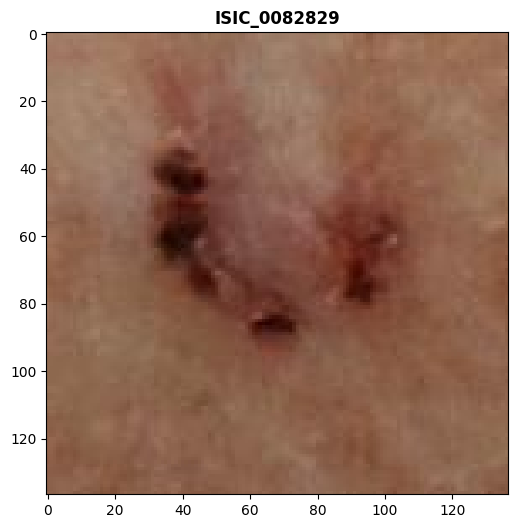

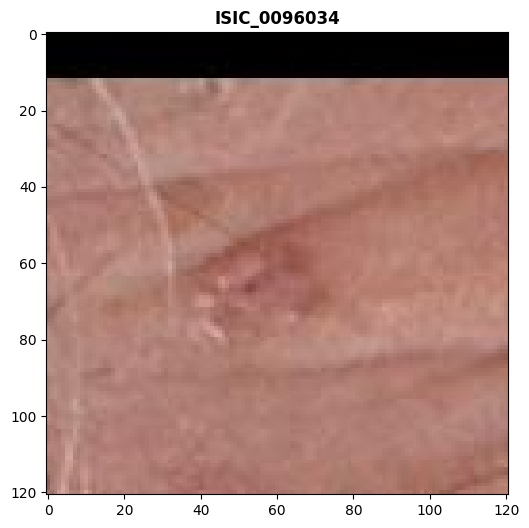

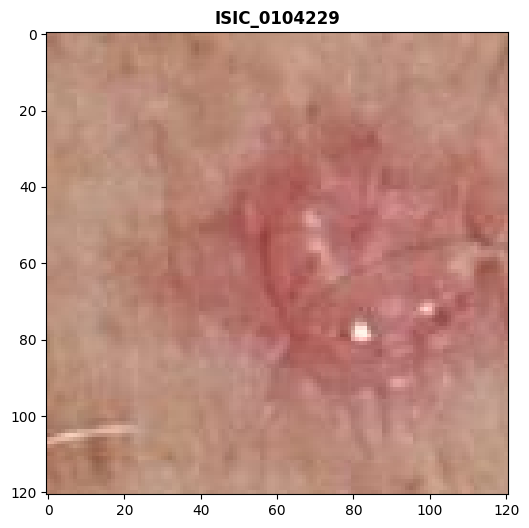

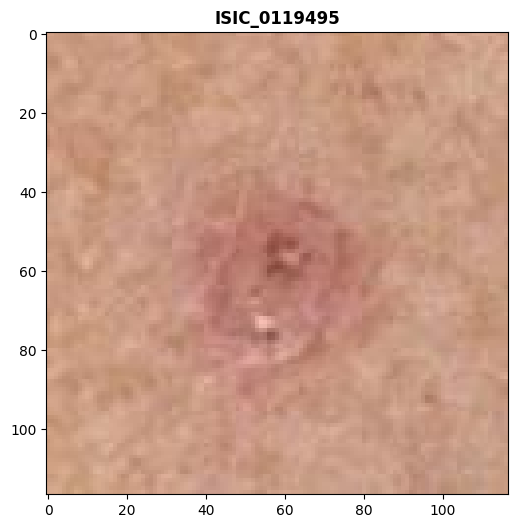

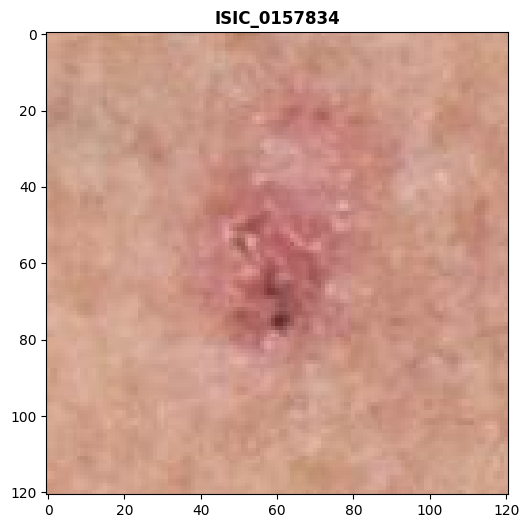

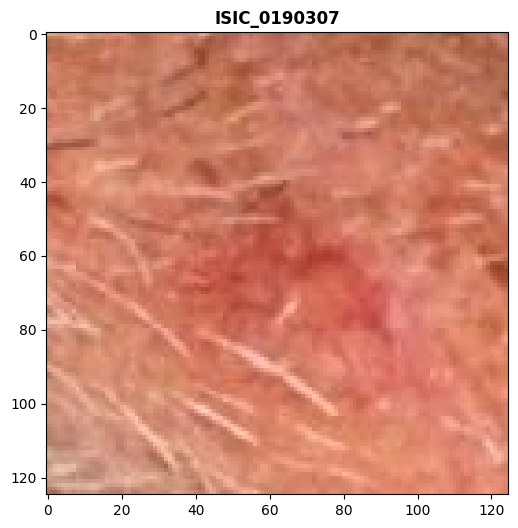

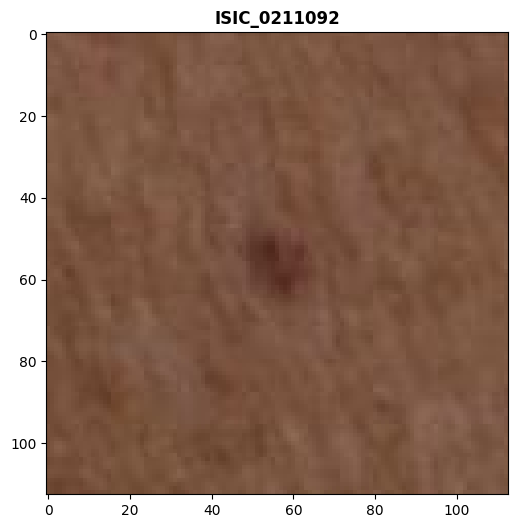

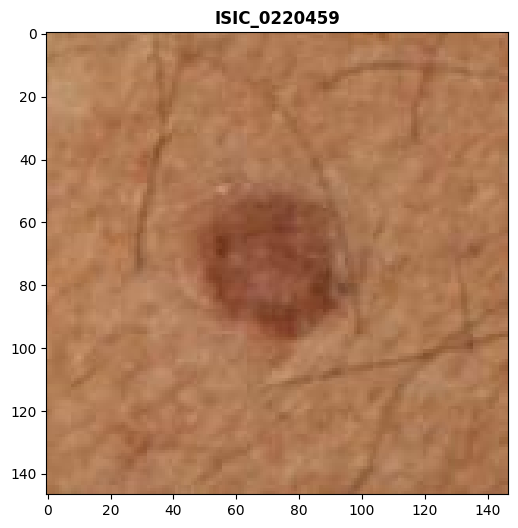

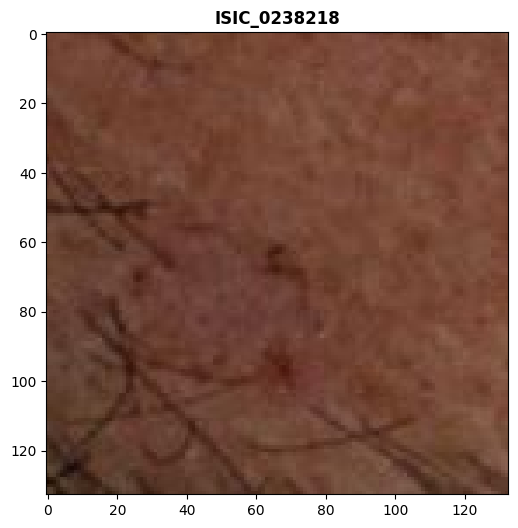

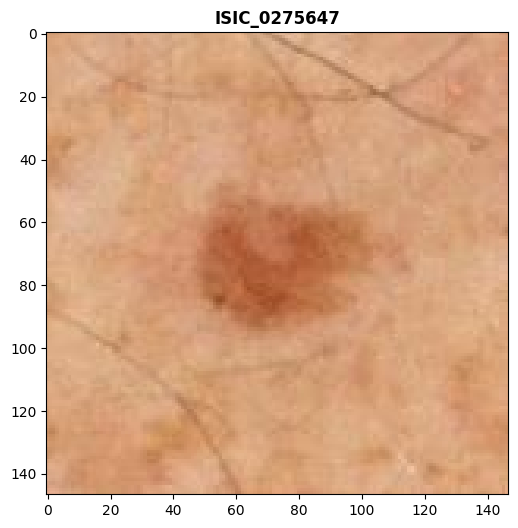

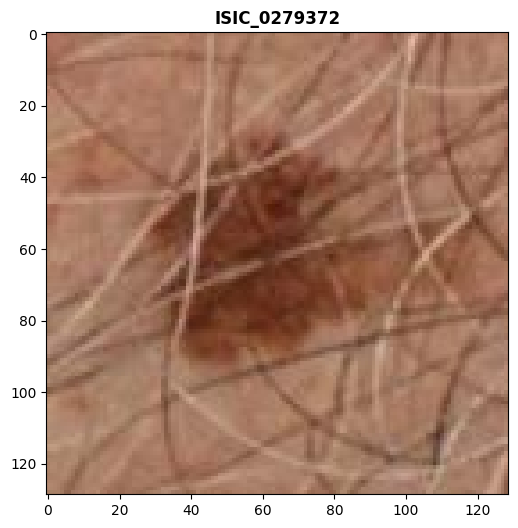

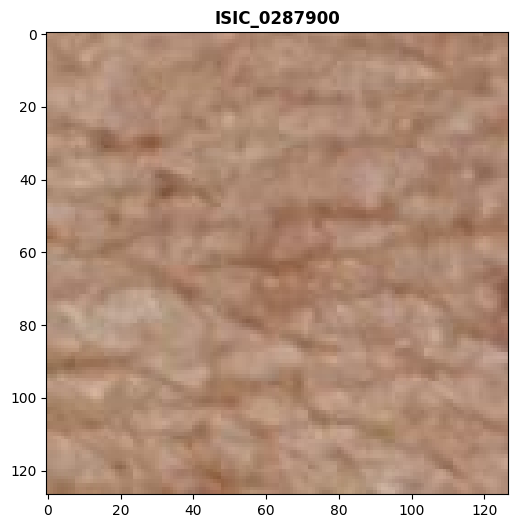

In [13]:
def load_img_from_hdf5(
    isic_id: str, 
    file_path: str|Path = CFG.TRAIN_HDF5, 
    n_channels: int = 3
):
    """
    Load an image from the HDF5 dataset file by specifying an ISIC ID.
    
    The ISIC ID is expected to be in the form 'ISIC_#######'.
    
    Args:
        isic_id (str): The ID of the image to load.
        file_path (str): The path to the HDF5 file.
        n_channels (int): Number of channels (3 for RGB, 1 for grayscale).
    
    Returns:
        np.ndarray: The loaded image.
    
    Raises:
        KeyError: If the ISIC ID is not found in the HDF5 file.
        ValueError: If the image data cannot be decoded.
    
    Example Usage:
        img = load_img_from_hdf5('ISIC_0000000')
    """
    
    # Handle the case where the isic_id is passed incorrectly
    if not isic_id.lower().startswith("isic"):
        isic_id = f"ISIC_{int(str(isic_id).split('_', 1)[-1]):>07}"
        
    # Open the HDF5 file in read mode
    with h5py.File(file_path, 'r') as hf:
        
        # Retrieve the image data from the HDF5 dataset using the provided ISIC ID
        try:
            image_data = hf[isic_id][()]
        except KeyError:
            raise KeyError(f"ISIC ID {isic_id} not found in HDF5 file.")

        # Convert the binary data to a numpy array
        image_array = np.frombuffer(image_data, np.uint8)

        # Decode the image from the numpy array
        if n_channels == 3:
            # Load the image as a color image (BGR) and convert to RGB
            image = cv2.cvtColor(cv2.imdecode(image_array, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
        else:
            # Load the image as a grayscale image
            image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)

        # If the image failed to load for some reason (problems decoding) ...
        if image is None:
            raise ValueError(f"Could not decode image for ISIC ID: {isic_id}")
        
        return image
    
isicID_list = train_meta[train_meta['target'] == 1]['isic_id'].to_list()
    
for i, isicID in enumerate(isicID_list):
    plt.figure(figsize=(6,6))
    plt.title(isicID, fontweight="bold")
    # plt.imshow(load_img_from_hdf5("ISIC_0015670"))
    plt.imshow(load_img_from_hdf5(isicID))
    plt.show()
    if i > 10:
        break

METADATA_COL2DESC = {
    "isic_id": "Unique identifier for each image case.",
    "target": "Binary class label indicating if the lesion is benign (0) or malignant (1).",
    "patient_id": "Unique identifier for each patient.",
    "age_approx": "Approximate age of the patient at the time of imaging.",
    "sex": "Sex of the patient (male or female).",
    "anatom_site_general": "General location of the lesion on the patient's body (e.g., upper extremity, posterior torso).",
    "clin_size_long_diam_mm": "Maximum diameter of the lesion in millimeters.",
    "image_type": "Type of image captured, as defined in the ISIC Archive.",
    "tbp_tile_type": "Lighting modality of the 3D Total Body Photography (TBP) source image.",
    "tbp_lv_A": "Color channel A inside the lesion; related to the green-red axis in LAB color space.",
    "tbp_lv_Aext": "Color channel A outside the lesion; related to the green-red axis in LAB color space.",
    "tbp_lv_B": "Color channel B inside the lesion; related to the blue-yellow axis in LAB color space.",
    "tbp_lv_Bext": "Color channel B outside the lesion; related to the blue-yellow axis in LAB color space.",
    "tbp_lv_C": "Chroma value inside the lesion, indicating color purity.",
    "tbp_lv_Cext": "Chroma value outside the lesion, indicating color purity.",
    "tbp_lv_H": "Hue value inside the lesion, representing the type of color (e.g., red, brown) in LAB color space.",
    "tbp_lv_Hext": "Hue value outside the lesion, representing the type of color (e.g., red, brown) in LAB color space.",
    "tbp_lv_L": "Luminance value inside the lesion; related to lightness in LAB color space.",
    "tbp_lv_Lext": "Luminance value outside the lesion; related to lightness in LAB color space.",
    "tbp_lv_areaMM2": "Area of the lesion in square millimeters.",
    "tbp_lv_area_perim_ratio": "Ratio of the lesion's perimeter to its area, indicating border jaggedness.",
    "tbp_lv_color_std_mean": "Mean color irregularity within the lesion, calculated as the variance of colors.",
    "tbp_lv_deltaA": "Average contrast in color channel A between inside and outside the lesion.",
    "tbp_lv_deltaB": "Average contrast in color channel B between inside and outside the lesion.",
    "tbp_lv_deltaL": "Average contrast in luminance between inside and outside the lesion.",
    "tbp_lv_deltaLB": "Combined contrast between the lesion and its immediate surrounding skin.",
    "tbp_lv_deltaLBnorm": "Normalized contrast between the lesion and its immediate surrounding skin in LAB color space.",
    "tbp_lv_eccentricity": "Eccentricity of the lesion, indicating how elongated it is.",
    "tbp_lv_location": "Detailed anatomical location of the lesion, dividing body parts further (e.g., Left Arm - Upper).",
    "tbp_lv_location_simple": "Simplified anatomical location of the lesion (e.g., Left Arm).",
    "tbp_lv_minorAxisMM": "Smallest diameter of the lesion in millimeters.",
    "tbp_lv_nevi_confidence": "Confidence score (0-100) from a neural network classifier estimating the probability that the lesion is a nevus.",
    "tbp_lv_norm_border": "Normalized border irregularity score on a scale of 0-10.",
    "tbp_lv_norm_color": "Normalized color variation score on a scale of 0-10.",
    "tbp_lv_perimeterMM": "Perimeter of the lesion in millimeters.",
    "tbp_lv_radial_color_std_max": "Color asymmetry score within the lesion, based on color variance in concentric rings.",
    "tbp_lv_stdL": "Standard deviation of luminance within the lesion.",
    "tbp_lv_stdLExt": "Standard deviation of luminance outside the lesion.",
    "tbp_lv_symm_2axis": "Measure of asymmetry of the lesion's border about a secondary axis.",
    "tbp_lv_symm_2axis_angle": "Angle of the secondary axis of symmetry for the lesion's border.",
    "tbp_lv_x": "X-coordinate of the lesion in the 3D TBP model.",
    "tbp_lv_y": "Y-coordinate of the lesion in the 3D TBP model.",
    "tbp_lv_z": "Z-coordinate of the lesion in the 3D TBP model.",
    "attribution": "Source or institution responsible for the image.",
    "copyright_license": "Type of copyright license for the image.",
    "lesion_id": "Unique identifier for lesions that were manually tagged as lesions of interest.",
    "iddx_full": "Full classified diagnosis of the lesion.",
    "iddx_1": "First-level diagnosis of the lesion (e.g., Benign, Malignant).",
    "iddx_2": "Second-level diagnosis providing more specific details about the lesion.",
    "iddx_3": "Third-level diagnosis with further classification details.",
    "iddx_4": "Fourth-level diagnosis with additional specificity.",
    "iddx_5": "Fifth-level diagnosis, providing the most detailed classification.",
    "mel_mitotic_index": "Mitotic index of invasive malignant melanomas, indicating cell division rate.",
    "mel_thick_mm": "Thickness in millimeters of melanoma invasion.",
    "tbp_lv_dnn_lesion_confidence": "Lesion confidence score (0-100) from a deep neural network classifier."
}


METADATA_COL2NAME = {
    "isic_id": "Unique Case Identifier",
    "target": "Binary Lession Classification",
    "patient_id": "Unique Patient Identifier",
    "age_approx": "Approximate Age",
    "sex": "Sex",
    "anatom_site_general": "General Anatomical Location",
    "clin_size_long_diam_mm": "Clinical Size (Longest Diameter in mm)",
    "image_type": "Image Type",
    "tbp_tile_type": "TBP Tile Type",
    "tbp_lv_A": "Color Channel A Inside Lesion",
    "tbp_lv_Aext": "Color Channel A Outside Lesion",
    "tbp_lv_B": "Color Channel B Inside Lesion",
    "tbp_lv_Bext": "Color Channel B Outside Lesion",
    "tbp_lv_C": "Chroma Inside Lesion",
    "tbp_lv_Cext": "Chroma Outside Lesion",
    "tbp_lv_H": "Hue Inside Lesion",
    "tbp_lv_Hext": "Hue Outside Lesion",
    "tbp_lv_L": "Luminance Inside Lesion",
    "tbp_lv_Lext": "Luminance Outside Lesion",
    "tbp_lv_areaMM2": "Lesion Area (mm²)",
    "tbp_lv_area_perim_ratio": "Area-to-Perimeter Ratio",
    "tbp_lv_color_std_mean": "Mean Color Irregularity",
    "tbp_lv_deltaA": "Delta A (Inside vs. Outside)",
    "tbp_lv_deltaB": "Delta B (Inside vs. Outside)",
    "tbp_lv_deltaL": "Delta L (Inside vs. Outside)",
    "tbp_lv_deltaLB": "Delta LB (Contrast)",
    "tbp_lv_deltaLBnorm": "Normalized Delta LB (Contrast)",
    "tbp_lv_eccentricity": "Eccentricity",
    "tbp_lv_location": "Detailed Anatomical Location",
    "tbp_lv_location_simple": "Simplified Anatomical Location",
    "tbp_lv_minorAxisMM": "Smallest Diameter (mm)",
    "tbp_lv_nevi_confidence": "Nevus Confidence Score",
    "tbp_lv_norm_border": "Normalized Border Irregularity",
    "tbp_lv_norm_color": "Normalized Color Variation",
    "tbp_lv_perimeterMM": "Lesion Perimeter (mm)",
    "tbp_lv_radial_color_std_max": "Radial Color Standard Deviation",
    "tbp_lv_stdL": "Standard Deviation of Luminance (Inside)",
    "tbp_lv_stdLExt": "Standard Deviation of Luminance (Outside)",
    "tbp_lv_symm_2axis": "Symmetry (Second Axis)",
    "tbp_lv_symm_2axis_angle": "Symmetry Angle (Second Axis)",
    "tbp_lv_x": "X-Coordinate",
    "tbp_lv_y": "Y-Coordinate",
    "tbp_lv_z": "Z-Coordinate",
    "attribution": "Image Source",
    "copyright_license": "Copyright License",
    "lesion_id": "Unique Lesion Identifier",
    "iddx_full": "Full Diagnosis",
    "iddx_1": "First Level Diagnosis",
    "iddx_2": "Second Level Diagnosis",
    "iddx_3": "Third Level Diagnosis",
    "iddx_4": "Fourth Level Diagnosis",
    "iddx_5": "Fifth Level Diagnosis",
    "mel_mitotic_index": "Mitotic Index (Melanoma)",
    "mel_thick_mm": "Thickness of Melanoma (mm)",
    "tbp_lv_dnn_lesion_confidence": "Lesion Confidence Score"
}
